In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.svm import SVC
import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [2]:
def convert_to_float(data):
    data=data
    for i in data:
        for index,j in enumerate(i):
            i[index]=float(j)
    return data

def get_list_fromcsv(file):
    with open(file, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data

In [3]:
df_embedsSG=pd.read_csv('C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/pagetitle-embedding-model skipgram-loss 0.36599-200405.csv')
#df_embedsCBOW=pd.read_csv('gdrive/My Drive/ERProject/Data/pagetitle-embedding-model CBOW-loss 0.86-200404.csv')
df_encodes=pd.read_csv('C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/binary_codes.csv')
model_encodes_list=list(df_encodes['model_binary'])
brand_encodes_list=list(df_encodes['brand_binary'])
#df_final=pd.read_csv('gdrive/My Drive/ERProject/Data/final dataframe with specid_pagetitle_brand_model-200404.csv')
#page_title_list=list(df_final['page_title'])
spec_id_list=list(df_embedsSG['spec_id'])
print(spec_id_list[2])
df_embedsSG=df_embedsSG.drop(['spec_id'],axis=1)
data=df_embedsSG.values.tolist()
data=convert_to_float(data)
#df1=pd.read_csv("gdrive/My Drive/hashes/all_web_final_ds.csv")
#page_title_dict=dict(zip(spec_id_list,page_title_list))

embeddings_dict=dict(zip(spec_id_list,data))
model_encodes_dict=dict(zip(spec_id_list,model_encodes_list))
brand_encodes_dict=dict(zip(spec_id_list,brand_encodes_list))
#print(embeddings_dict[spec_id_list[0]])
df_groundtruth=pd.read_csv("C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/final_extended_groundtruth.csv")

buy.net//4239


In [4]:
new_df=pd.DataFrame()
new_df['vector1']=df_groundtruth['left_spec_id'].apply(lambda x: np.array(embeddings_dict[x]))
new_df['vector2']=df_groundtruth['right_spec_id'].apply(lambda x: np.array(embeddings_dict[x]))
left_list=list(df_groundtruth['left_spec_id'])
right_list=list(df_groundtruth['right_spec_id'])
brand_list=[]
model_list=[]
for i in range(len(left_list)):
  if (brand_encodes_dict[left_list[i]]==brand_encodes_dict[right_list[i]]):
    brand_list.append(int(1))
  else:
    brand_list.append(int(0))
for i in range(len(left_list)):
  if (model_encodes_dict[left_list[i]]==model_encodes_dict[right_list[i]]):
    model_list.append(int(1))
  else:
    model_list.append(int(0))

new_df['abs_diff']=1-(np.subtract(new_df['vector1'],new_df['vector2'])).abs()
abs_diff_list=list(new_df['abs_diff'])
df_absdiff=pd.DataFrame(abs_diff_list)
df_absdiff[300]=brand_list
df_absdiff[301]=model_list
print(df_absdiff.head())

        0         1         2         3         4         5         6    \
0  0.997625  0.988740  0.995138  0.985958  0.977046  0.993935  0.980872   
1  0.999377  0.997046  0.996956  0.987736  0.984633  0.989180  0.994408   
2  0.993932  0.997313  0.989149  0.976998  0.973722  0.993381  0.997572   
3  0.994729  0.991153  0.996982  0.993652  0.990244  0.990611  0.984455   
4  0.998418  0.965758  0.979940  0.989037  0.997031  0.975525  0.976280   

        7         8         9    ...       292       293       294       295  \
0  0.992165  0.982019  0.964137  ...  0.980535  0.992832  0.998886  0.996241   
1  0.994585  0.987303  0.994005  ...  0.997531  0.973616  0.984738  0.999907   
2  0.995421  0.999765  0.991003  ...  0.985391  0.963141  0.996169  0.981094   
3  0.994277  0.997171  0.992763  ...  0.998935  0.981874  0.995334  0.986817   
4  0.974280  0.990112  0.991736  ...  0.999353  0.982289  0.999908  0.979733   

        296       297       298       299  300  301  
0  0.998890  0

In [5]:
X=df_absdiff.copy()
y=df_groundtruth['label']
'''
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
print(X_train.head())
print(y_train.head())
list_1s=list(y_train)
list_numpy=np.array(list_1s)
(unique,counts)=np.unique(list_numpy,return_counts=True)
print('training:\n')
print(np.asarray((unique,counts)))
list_1s_test=list(y_test)
list_numpy_test=np.array(list_1s_test)
(unique_test,counts_test)=np.unique(list_numpy_test,return_counts=True)
print("testing:")
print(np.asarray((unique_test,counts_test)))
#print(y_test)

item = X_train.head()
print(item)
'''

'\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)\nprint(X_train.head())\nprint(y_train.head())\nlist_1s=list(y_train)\nlist_numpy=np.array(list_1s)\n(unique,counts)=np.unique(list_numpy,return_counts=True)\nprint(\'training:\n\')\nprint(np.asarray((unique,counts)))\nlist_1s_test=list(y_test)\nlist_numpy_test=np.array(list_1s_test)\n(unique_test,counts_test)=np.unique(list_numpy_test,return_counts=True)\nprint("testing:")\nprint(np.asarray((unique_test,counts_test)))\n#print(y_test)\n\nitem = X_train.head()\nprint(item)\n'

In [6]:
print('Shape of X = {}'.format(X.shape))
print('Shape of Y = {}'.format(y.shape))

Shape of X = (97615, 302)
Shape of Y = (97615,)


## Splitting Data into Train-Val-Test

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [8]:
print('shape of X_train : {}'.format(X_train.shape))
print('shape of Y_train : {}'.format(Y_train.shape))
#print('shape of X_val   : {}'.format(X_val.shape))
#print('shape of Y_val   : {}'.format(Y_val.shape))
print('shape of X_test  : {}'.format(X_test.shape))
print('shape of Y_test  : {}'.format(Y_test.shape))

shape of X_train : (78092, 302)
shape of Y_train : (78092,)
shape of X_test  : (19523, 302)
shape of Y_test  : (19523,)


In [9]:
dataset = tf.data.Dataset.from_tensor_slices((X_train.values, Y_train.values))

In [10]:
train_dataset = dataset.shuffle(len(data))

In [11]:
X_train = X_train.values
Y_train = Y_train.values
#X_val   = X_val.values
#Y_val   = Y_val.values
X_test  = X_test.values
Y_test  = Y_test.values

In [12]:
Y_train.transpose
#Y_val.transpose
Y_test.transpose

<function ndarray.transpose>

## Designing Neural Network Architecture

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = 'tanh'),
    tf.keras.layers.Dense(64,activation = 'tanh'),
    tf.keras.layers.Dense(32,activation = 'tanh'),
    #Dropout(0.2),
    #tf.keras.layers.Dense(16, activation = 'tanh'), 
    #Dropout(0.2),
    tf.keras.layers.Dense(8, activation = 'tanh'), 
    #tf.keras.layers.Dense(8,  activation = 'tanh'), 
    #Dropout(0.2),
    tf.keras.layers.Dense(4,  activation = 'tanh'),
    #Dropout(0.2),
    tf.keras.layers.Dense(2,  activation = 'sigmoid')
])

In [14]:
model.compile(optimizer = 'Adadelta',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, batch_size = 1024, epochs = 100,shuffle = True, 
                    validation_split = 0.3)

Train on 54664 samples, validate on 23428 samples
Epoch 1/100
54664/54664 [==============================] - 3s 48us/sample - loss: 0.6895 - accuracy: 0.4832 - val_loss: 0.6893 - val_accuracy: 0.4722
Epoch 2/100
54664/54664 [==============================] - 1s 10us/sample - loss: 0.6882 - accuracy: 0.4868 - val_loss: 0.6878 - val_accuracy: 0.5268
Epoch 3/100
54664/54664 [==============================] - 1s 9us/sample - loss: 0.6871 - accuracy: 0.7247 - val_loss: 0.6867 - val_accuracy: 0.8270
Epoch 4/100
54664/54664 [==============================] - 0s 9us/sample - loss: 0.6863 - accuracy: 0.8811 - val_loss: 0.6857 - val_accuracy: 0.9050
Epoch 5/100
54664/54664 [==============================] - 1s 9us/sample - loss: 0.6855 - accuracy: 0.8968 - val_loss: 0.6848 - val_accuracy: 0.8794
Epoch 6/100
54664/54664 [==============================] - 0s 9us/sample - loss: 0.6847 - accuracy: 0.8260 - val_loss: 0.6840 - val_accuracy: 0.8421
Epoch 7/100
54664/54664 [=============================

54664/54664 [==============================] - 1s 10us/sample - loss: 0.6344 - accuracy: 0.9026 - val_loss: 0.6333 - val_accuracy: 0.9077
Epoch 56/100
54664/54664 [==============================] - 1s 9us/sample - loss: 0.6331 - accuracy: 0.9026 - val_loss: 0.6320 - val_accuracy: 0.9077
Epoch 57/100
54664/54664 [==============================] - 1s 10us/sample - loss: 0.6319 - accuracy: 0.9026 - val_loss: 0.6308 - val_accuracy: 0.9077
Epoch 58/100
54664/54664 [==============================] - 1s 10us/sample - loss: 0.6306 - accuracy: 0.9026 - val_loss: 0.6295 - val_accuracy: 0.9077
Epoch 59/100
54664/54664 [==============================] - 1s 10us/sample - loss: 0.6294 - accuracy: 0.9026 - val_loss: 0.6282 - val_accuracy: 0.9077
Epoch 60/100
54664/54664 [==============================] - 1s 11us/sample - loss: 0.6281 - accuracy: 0.9026 - val_loss: 0.6270 - val_accuracy: 0.9077
Epoch 61/100
54664/54664 [==============================] - 1s 10us/sample - loss: 0.6268 - accuracy: 0.9026

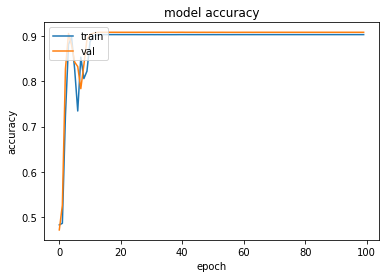

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

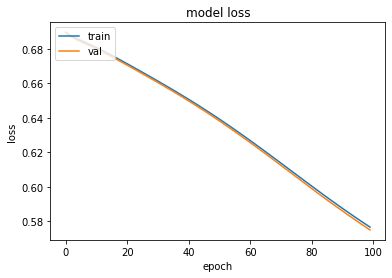

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
test_pred_mlp = model.predict(X_test)
test_acc       = accuracy_score(Y_test, test_pred)
f1_test_score  = f1_score(Y_test  ,test_pred,average='weighted')

NameError: name 'test_pred' is not defined

## Trying SVM

In [ ]:
Kernels = ['rbf', 'poly', 'linear']
c = [0.05, 1, 10, 20, 50 , 100, 1000]
gamma = [0.1, 0.2, 0.5, 1, 2, 4, 8]

In [21]:
def clf(ker,g,c,X,Y):
    svm_clf = svm.SVC(kernel=ker, gamma=g, C = c, max_iter=20000, tol=1e-3)
    scores = cross_val_score(svm_clf, X, Y,cv = 5 ,scoring = 'f1_weighted')
    return (scores)

In [22]:
scores = []
for ker in Kernels:
    score= clf(ker = ker, g = 1, c = 1,X = X_train, Y = Y_train)
    score = np.mean(score)
    scores.append(score)

C:\Users\anujp\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\anujp\anaconda3\lib\sit

<Figure size 432x288 with 0 Axes>

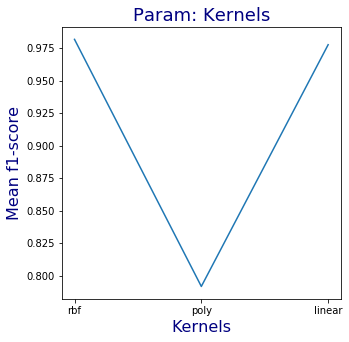

In [23]:
plt.figure(1)
plt.suptitle('Param: Kernels')
plt.figure(figsize=(5,5) )
plt.plot(Kernels, scores)
plt.title('Param: Kernels', fontsize = 18, color = 'navy')
plt.xlabel('Kernels', color = 'navy',fontsize = 16)
plt.ylabel('Mean f1-score', color='navy',fontsize = 16)
plt.show()

In [19]:
# Cassifier
svm_clf = svm.SVC(kernel='rbf',gamma=1, C = 1,max_iter=20000, tol=1e-3)
svm_clf.fit(X_train,Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=20000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# Predictions
test_pred  = svm_clf.predict(X_test)
train_pred = svm_clf.predict(X_train)

# Performance
train_acc      = accuracy_score(Y_train, train_pred)
f1_train_score = f1_score(Y_train, train_pred,average='weighted')

test_acc       = accuracy_score(Y_test, test_pred)
f1_test_score  = f1_score(Y_test  ,test_pred,average='weighted')

# Printing
print('Training Accuracy : {}'. format(train_acc))
print('Training f1-score : {}'. format(f1_train_score))
print('Testing Accuracy  : {}'. format(test_acc))
print('Testing f1-score  : {}'. format(f1_test_score))

Training Accuracy : 0.9835066332018645
Training f1-score : 0.9835051471893679
Testing Accuracy  : 0.9824822004814834
Testing f1-score  : 0.9824793345126296


Normalized confusion matrix


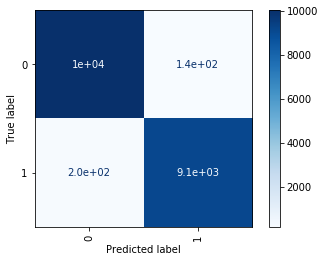

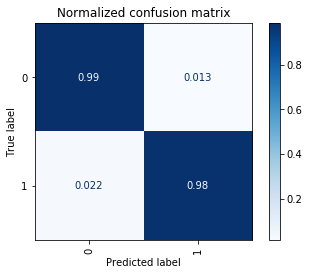

<Figure size 648x648 with 0 Axes>

In [21]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        disp = plot_confusion_matrix(svm_clf, X_test,Y_test,cmap=plt.cm.Blues,normalize=normalize,xticks_rotation = 'vertical')
disp.ax_.set_title(title)
plt.figure(figsize=(9,9))
print(title)
plt.show()

In [49]:
pairs2pred= pd.read_csv(('C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/pairs_to_predict.csv'))

In [50]:
pairs2pred.columns = ["left_spec_id", "right_spec_id"]

In [51]:
print(pairs2pred)

                     left_spec_id                    right_spec_id
0                   buy.net//4233              www.ebay.com//56325
1                   buy.net//4233              www.ebay.com//60878
2             www.ebay.com//53833              www.ebay.com//56424
3             www.ebay.com//53833          www.shopbot.com.au//307
4             www.ebay.com//53833              www.ebay.com//55645
...                           ...                              ...
2540538   www.priceme.co.nz//1944          www.priceme.co.nz//2345
2540539   www.priceme.co.nz//2345  www.ukdigitalcameras.co.uk//267
2540540   www.priceme.co.nz//2265            www.priceme.co.nz//69
2540541  www.shopbot.com.au//1247            www.shopmania.in//634
2540542     www.shopmania.in//902   www.ukdigitalcameras.co.uk//45

[2540543 rows x 2 columns]


In [52]:
df_embedsSG=pd.read_csv('C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/pagetitle-embedding-model skipgram-loss 0.36599-200405.csv')
#df_embedsCBOW=pd.read_csv('gdrive/My Drive/ERProject/Data/pagetitle-embedding-model CBOW-loss 0.86-200404.csv')
df_encodes=pd.read_csv('C:/Users/anujp/Desktop/sort/Entity_Resolution_Project/data/csv_files/binary_codes.csv')
model_encodes_list=list(df_encodes['model_binary'])
brand_encodes_list=list(df_encodes['brand_binary'])
#df_final=pd.read_csv('gdrive/My Drive/ERProject/Data/final dataframe with specid_pagetitle_brand_model-200404.csv')
#page_title_list=list(df_final['page_title'])
spec_id_list=list(df_embedsSG['spec_id'])
print(spec_id_list[2])
df_embedsSG=df_embedsSG.drop(['spec_id'],axis=1)
data=df_embedsSG.values.tolist()
data=convert_to_float(data)
#df1=pd.read_csv("gdrive/My Drive/hashes/all_web_final_ds.csv")
#page_title_dict=dict(zip(spec_id_list,page_title_list))

embeddings_dict=dict(zip(spec_id_list,data))
model_encodes_dict=dict(zip(spec_id_list,model_encodes_list))
brand_encodes_dict=dict(zip(spec_id_list,brand_encodes_list))
#print(embeddings_dict[spec_id_list[0]])
df_groundtruth=pairs2pred

buy.net//4239


In [ ]:
new_df=pd.DataFrame()
new_df['vector1']=df_groundtruth['left_spec_id'].apply(lambda x: np.array(embeddings_dict[x]))
new_df['vector2']=df_groundtruth['right_spec_id'].apply(lambda x: np.array(embeddings_dict[x]))
left_list=list(df_groundtruth['left_spec_id'])
right_list=list(df_groundtruth['right_spec_id'])
brand_list=[]
model_list=[]
for i in range(0, 508100):
  if (brand_encodes_dict[left_list[i]]==brand_encodes_dict[right_list[i]]):
    brand_list.append(int(1))
  else:
    brand_list.append(int(0))
for i in range(len(left_list)):
  if (model_encodes_dict[left_list[i]]==model_encodes_dict[right_list[i]]):
    model_list.append(int(1))
  else:
    model_list.append(int(0))

new_df['abs_diff']=1-(np.subtract(new_df['vector1'],new_df['vector2'])).abs()
abs_diff_list=list(new_df['abs_diff'])
df_absdiff=pd.DataFrame(abs_diff_list)
df_absdiff[300]=brand_list
df_absdiff[301]=model_list
print(df_absdiff.head())